# Japan Trade Analysis & Visualization

In this ipython notebook we will analyze Japans trading partner countries and how much trade is being conducted between Japan and these countries. This notebook could be used for international institutions who are making strategic investments in Japan, Japaneese currency Yen, soveriegn bonds of Japan or much more instruments or investments that are directly or indirectly related to the Japanese economy. 

Submitted By:Saeed Rahman
Mail:srahman3@stevens.edu
Date: 2/1/2017
Data taken from:http://www.customs.go.jp/toukei/info/index_e.htm

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
country_eng = pd.read_csv('C:/Users/saeed/Desktop/japan trade stats/country_eng.csv')
custom = pd.read_csv('C:/Users/saeed/Desktop/japan trade stats/custom.csv')
exp_custom_latest_ym = pd.read_csv('C:/Users/saeed/Desktop/japan trade stats/custom_latest_ym.csv')

In [5]:
country_eng.head()
#List of all countries involved in trade with Japan

,Country,Country_name,Area
0,103,Republic_of_Korea,Asia
1,104,North_Korea,Asia
2,105,People's_Republic_of_China,Asia
3,106,Taiwan,Asia
4,107,Mongolia,Asia


In [6]:
exp_custom_latest_ym.head()
#Trade details of all the countries with the Host 

,exp_imp,Custom,Year,month,Country,Unit1,Unit2,hs2,hs4,hs6,hs9,Q1,Q2,Value
0,1,100,2016,1,103,,KG,0,0,0,190,0,665021,2376424
1,1,100,2016,1,105,,KG,0,0,0,190,0,1309209,5825954
2,1,100,2016,1,106,,KG,0,0,0,190,0,432366,4783447
3,1,100,2016,1,107,,KG,0,0,0,190,0,1,216
4,1,100,2016,1,108,,KG,0,0,0,190,0,449242,7039583


In [7]:
custom.head()
# The different customs offices or port of entry in Japan

,Custom,d_name
0,100,東京
1,103,東京国際
2,104,成田国際
3,120,新潟
4,122,直江津


In [8]:
exp_custom_latest_ym.describe()

,exp_imp,Custom,Year,month,Country,hs2,hs4,hs6,hs9,Q1,Q2,Value
count,7525178.000000,7525178.000000,7525178.000000,7525178.000000,7525178.000000,7525178.000000,7525178.000000,7525178.000000,7.525178e+06,7.525178e+06,7.525178e+06,7.525178e+06
mean,1.427058,319.067371,2015.475219,6.285536,183.663100,64.355043,6453.793319,645426.209752,6.454264e+08,7.362858e+04,1.509689e+05,3.685059e+04
std,0.494651,186.024287,0.499386,3.319515,114.438132,25.443525,2550.905745,255093.414570,2.550934e+08,2.173945e+07,5.190437e+06,4.266283e+05
min,1.000000,100.000000,2015.000000,1.000000,103.000000,0.000000,0.000000,0.000000,1.100000e+01,0.000000e+00,0.000000e+00,2.010000e+02
25%,1.000000,104.000000,2015.000000,3.000000,106.000000,40.000000,4002.000000,400211.000000,4.002111e+08,0.000000e+00,8.600000e+01,7.330000e+02
50%,1.000000,300.000000,2015.000000,6.000000,118.000000,73.000000,7318.000000,731822.000000,7.318220e+08,0.000000e+00,6.870000e+02,2.623000e+03
75%,2.000000,500.000000,2016.000000,9.000000,220.000000,85.000000,8511.000000,851110.000000,8.511100e+08,6.000000e+00,7.068000e+03,1.107300e+04
max,2.000000,907.000000,2016.000000,12.000000,702.000000,97.000000,9706.000000,970600.000000,9.706000e+08,5.550000e+10,1.637796e+09,1.560166e+08


# Top 10 countries by Frequncy of trade

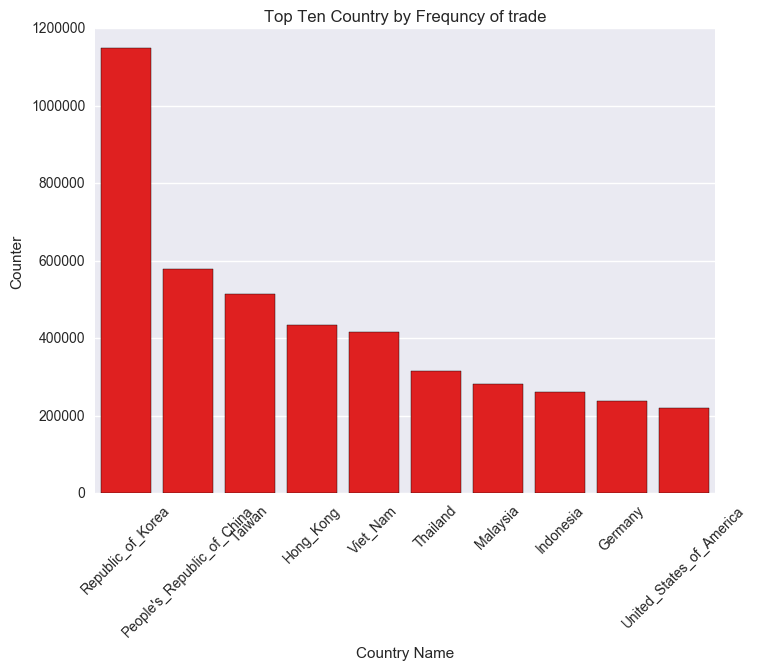

In [9]:
#This actually takes the frequency of country codes and displays the highest 10 of them
sorted_df = exp_custom_latest_ym['Country'].value_counts()[:10]
# test = exp_custom_latest_ym.sort_values('Value', ascending=False)
sorted_df_index=sorted_df.index
sorted_df_values=sorted_df.values
sorted_df_index= country_eng[country_eng['Country'].isin(sorted_df_index)]['Country_name'].unique()



fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = sorted_df_index,y = sorted_df_values,ax=ax,color='r')
plt.title('Top Ten Country by Frequncy of trade')
plt.ylabel('Counter')
plt.xlabel('Country Name')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

# Top 10 countries and Value traded in 2016

In [45]:
#merge the two dataframe,ie to put the country name into the main pandas frame
df = pd.merge(country_eng,exp_custom_latest_ym,on='Country')
country_year_2016 = df[df['Year'] == 2016] 


country_year = country_year_2016.groupby([country_year_2016['Country']])['Value'].sum()
#selecting the top 10 countries that did trade with Japan in Volume
country_year = country_year.sort_values(ascending=False)[:10]

#Creating a pivot table for the heat map
table_count = pd.pivot_table(data = country_year_2016[country_year_2016['Country'].isin(country_year.index)],
              index=['month'],columns=['Country_name'],values=['Value'],aggfunc='sum')


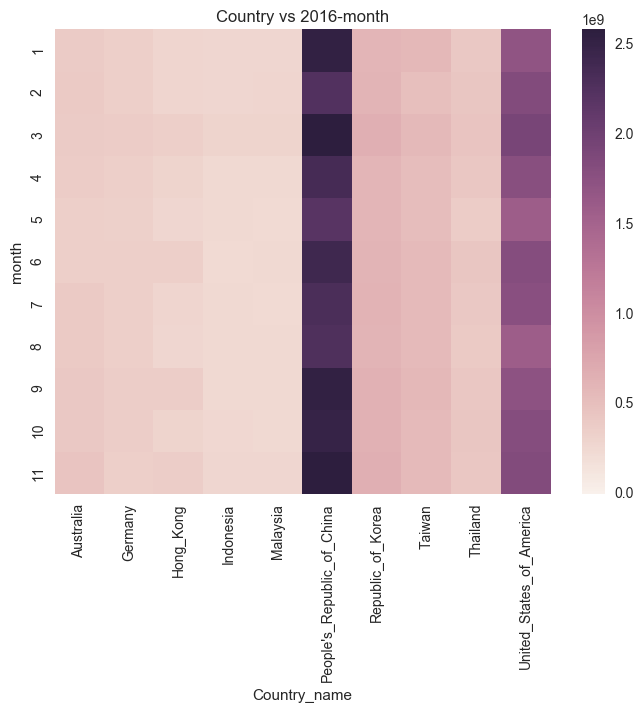

In [40]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Value'],vmin =0 )
plt.title('Country vs 2016-month')

In [120]:
total_trade = df.groupby([df['Country']])['Value'].sum()
total_trade=total_trade.sort_values(ascending=False)[:10]
dft=total_trade.to_frame()
total_trade_value=df[df['Country'].isin(total_trade.index)]

In [142]:
#  country_eng[country_eng.Country==total_trade.index]
# df.Country_name[]
# country_eng.Country_name[total_trade.index]
#country_eng['Country_name'].where(country_eng['Country']==105)


country_eng[country_eng['Country'].isin(total_trade.index)].Country_name.values

array(['Republic_of_Korea', "People's_Republic_of_China", 'Taiwan',
       'Hong_Kong', 'Thailand', 'Malaysia', 'Indonesia', 'Germany',
       'United_States_of_America', 'Australia'], dtype=object)

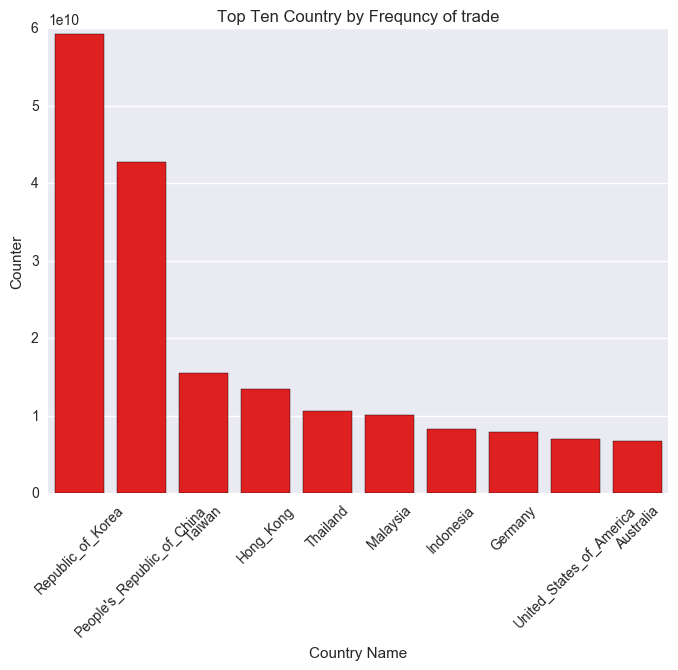

In [140]:
fig,ax = plt.subplots(figsize=(8,6))
#sns.barplot(x = country_eng.Country_name[total_trade.index].values,y=total_trade.values,ax=ax,color='r')
sns.barplot(x = country_eng[country_eng['Country'].isin(total_trade.index)].Country_name.values,y=total_trade.values,ax=ax,color='r')
plt.title('Top Ten Country by Frequncy of trade')
plt.ylabel('Counter')
plt.xlabel('Country Name')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

In [108]:
country_eng.Country_name[dft.index][:]

Country
105                 Panama
304                    NaN
103              Nicaragua
106           Bermuda_(UK)
111    Trinidad_and_Tobago
601                    NaN
213                   Fiji
108                Jamaica
113                  Haiti
118     French_West_Indies
Name: Country_name, dtype: object

In [115]:
dft.values

array([[59244704265],
       [42716010847],
       [15529895583],
       [13417019391],
       [10558686352],
       [10133583550],
       [ 8332721086],
       [ 7944913970],
       [ 6967329861],
       [ 6709584152]], dtype=int64)

In [94]:
country_eng.Country_name[dft.index]

Country
105                 Panama
304                    NaN
103              Nicaragua
106           Bermuda_(UK)
111    Trinidad_and_Tobago
601                    NaN
213                   Fiji
108                Jamaica
113                  Haiti
118     French_West_Indies
Name: Country_name, dtype: object

In [114]:
country_eng.Country_name[dft.index].values

array(['Panama', nan, 'Nicaragua', 'Bermuda_(UK)', 'Trinidad_and_Tobago',
       nan, 'Fiji', 'Jamaica', 'Haiti', 'French_West_Indies'], dtype=object)

In [116]:
total_trade.values

array([59244704265, 42716010847, 15529895583, 13417019391, 10558686352,
       10133583550,  8332721086,  7944913970,  6967329861,  6709584152], dtype=int64)

In [119]:
total_trade.values

array([59244704265, 42716010847, 15529895583, 13417019391, 10558686352,
       10133583550,  8332721086,  7944913970,  6967329861,  6709584152], dtype=int64)